In [ ]:
# Creating a Handwriting Classifier... Algorithm will predict what is written if given a new image...

In [1]:
#Importing the Libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the Dataset...
data = pd.read_csv('train.csv')
data.head()
# Label is indicating the number printed on the photo...

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
y = data.iloc[:, 0].values
y

array([1, 0, 1, ..., 7, 6, 9])

In [5]:
X = data.iloc[:, 1 :].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
X.shape

(42000, 784)

In [7]:
#Splitting the Dataset into Training Set and Test set...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [8]:
X_train.shape

(29400, 784)

In [9]:
X_train[0]  # It shows the pixel values for all the pixels...

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  64, 191, 255, 255, 128, 191, 128,  64,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 25

In [10]:
# Function to get the picture as per the pixels value...
def showImage(value):
    return plt.imshow(value.reshape(28, 28))   

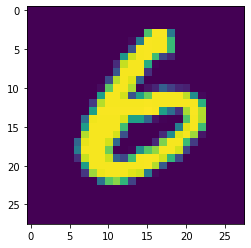

In [11]:
showImage(X_train[100])  # Checking the image for X_train[100]...

### Using the Decision Tree Classifier...

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 5)

In [13]:
# Fitting the Decision Tree Classifier to the Training Data...
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [14]:
def predictTreeResult(testValue):
    return tree_classifier.predict(testValue.reshape(1, 784))

In [15]:
predictTreeResult(X_test[400])

array([1])

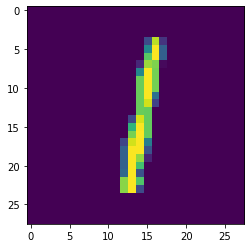

In [16]:
showImage(X_test[400])

In [17]:
y_pred = tree_classifier.predict(X_test)

In [18]:
y_pred.shape
y_test.shape

(12600,)

In [19]:
#Making the Confusion Matrix. (To get a proper understanding about the precision)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1120    0   10   13    7   29   21    3   13   10]
 [   0 1361   11    6    7    6    4   10    6    4]
 [  15   13 1029   40   19   13   33   30   30   16]
 [   7   12   38 1076    7   57   15   19   37   37]
 [   3    4   14    7 1044   15   26   11   24   82]
 [  17    6   10   67   12  888   32    8   43   24]
 [  25    4   29    6   18   30 1093    7   23    6]
 [   2   14   42   21   23   11    1 1173   14   37]
 [   9   20   32   43   28   26   33   12  993   26]
 [   4    6   15   22   61   20   12   48   41 1049]]


In [20]:
from sklearn.metrics import accuracy_score
decision_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our model is: ' + str(round(decision_accuracy, 4) * 100) + ' %.')

Accuracy of our model is: 85.92 %.


In [21]:
### GINI INDEX

### Using The Random Forest Classifier... 

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'gini', max_features = None)

In [23]:
# Fitting the Random Forest Classifier to the Training Data...
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
def predictForestResult(testValue):
    return forest_classifier.predict(testValue.reshape(1, 784))

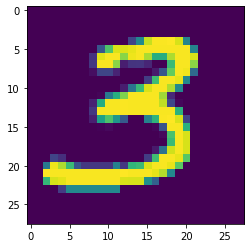

In [25]:
showImage(X_test[225])

In [26]:
predictForestResult(X_test[225])

array([3])

In [27]:
#Predicting the Test Set Results from the Training Set.
y_pred = forest_classifier.predict(X_test)

In [28]:
print(y_pred.shape)
print(y_test.shape)

(12600,)
(12600,)


In [29]:
#Making the Confusion Matrix. (To get a proper understanding about the precision)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1191    0    3    1    5   10    6    1    8    1]
 [   1 1391    8    3    3    5    1    2    1    0]
 [   9    5 1172    9    7    1    9   20    4    2]
 [   7    2   24 1206    2   20    1   10   22   11]
 [   2    5    3    0 1162    1    4    3    8   42]
 [   8    1    1   20    3 1046   11    2   11    4]
 [  10    3    2    1    6   10 1193    0   15    1]
 [   1    4   26    5    2    0    0 1278    2   20]
 [   2   13    8   12    4   10   11    0 1151   11]
 [   4    3    6    8   25    9    1   11   14 1197]]


In [30]:
forest_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our model is: ' + str(round(forest_accuracy, 4) * 100) + ' %.')

Accuracy of our model is: 95.13000000000001 %.
